# Data Science & Business Analytics
Task- 3 Perform 'Exploratory Data Analysis' on dataset 'Sample Superstore'
This task is about Exploratory Data Analysis- Retail to find out
weak areas where he can work to make more profit.

# GRIPJUNE21

In [6]:
# Importing all libraries required in this notebook
import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import matplotlib.pyplot as plt #For visualization
import seaborn as sns
import os
%matplotlib inline

# Importing our Dataset

In [7]:
df= pd.read_csv("C:\\Users\\MR Prakash\\Downloads\SampleSuperstore.csv")

In [8]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Information of Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
df.duplicated().sum()

17

In [11]:
df.drop_duplicates(inplace=True) #Removing the duplicates values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9977 non-null object
Segment         9977 non-null object
Country         9977 non-null object
City            9977 non-null object
State           9977 non-null object
Postal Code     9977 non-null int64
Region          9977 non-null object
Category        9977 non-null object
Sub-Category    9977 non-null object
Sales           9977 non-null float64
Quantity        9977 non-null int64
Discount        9977 non-null float64
Profit          9977 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [12]:
#Here postal code is not a useful column, hence we are dropping it.
df.drop(['Postal Code'],axis=1, inplace=True)

In [13]:
# Now Check for the null values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# As we see there is no null values present in dataset.

In [14]:
#finding the correlation between the features
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


# Here the correlation is done only 5 columns because the remaining columns contains non numerical values.

# Visualizing our dataset

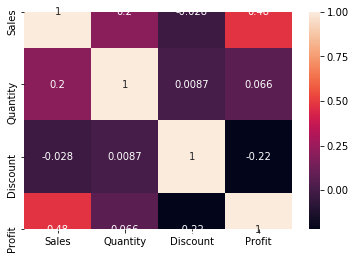

In [15]:
#visualizing the correlation between the features
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

# Where 1 represents strong positive correlation and -0.2 for negative correlation

In [16]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

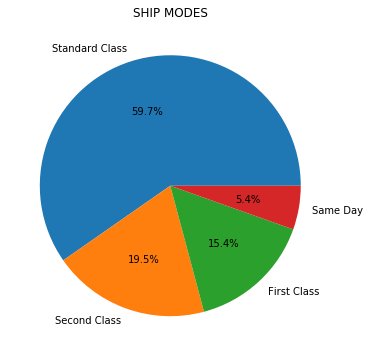

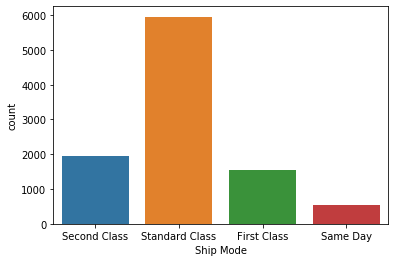

In [17]:

plt.figure(figsize=(6,6))
plt.title('SHIP MODES')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct= '%1.1f%%')
plt.show()
sns.countplot(x=df['Ship Mode'])

# In ship mode, most of them are preferring the standard class

In [19]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

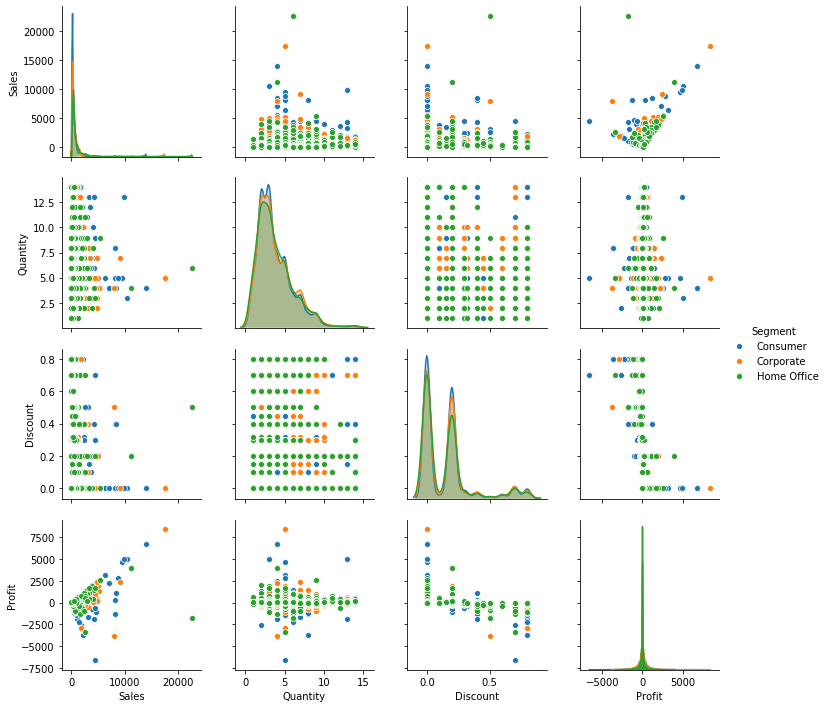

In [20]:
sns.pairplot(df,hue='Segment')

# Here we can see in segment, profit and sales has some positive correlation

In [21]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

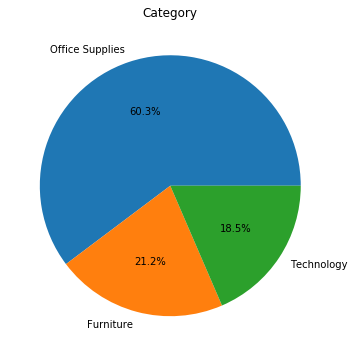

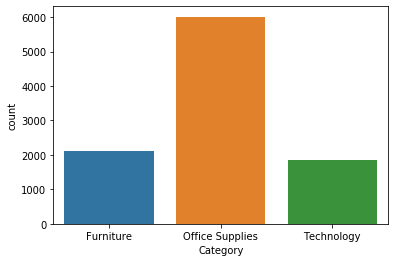

In [22]:
plt.figure(figsize=(6,6))
plt.title('Category')
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()
sns.countplot(x='Category',data=df)

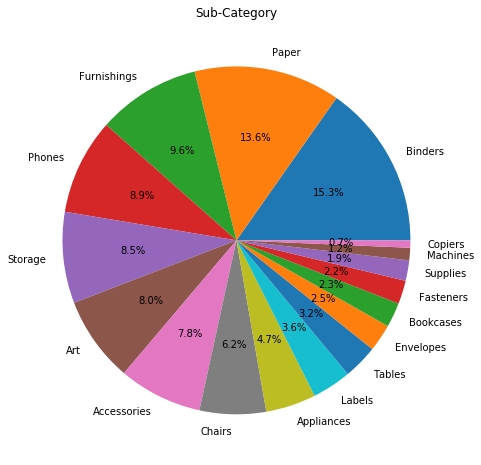

In [23]:
plt.figure(figsize=(8,8))
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index, autopct='%1.1f%%')
plt.show()

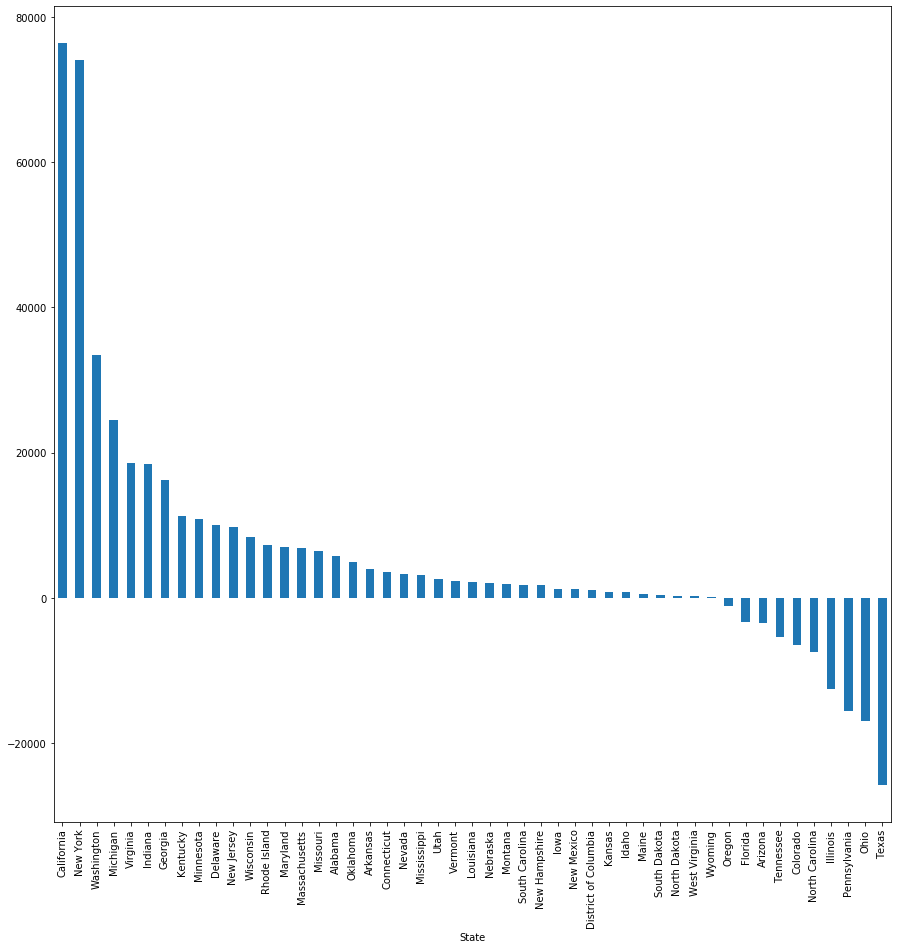

In [24]:
plt.figure(figsize=(15,15))
stpr=df.groupby(['State'])['Profit'].sum().nlargest(50)
stpr.plot.bar()

# Graph Display that California and New York have the highest profits while Texas and Ohio have the least profits.

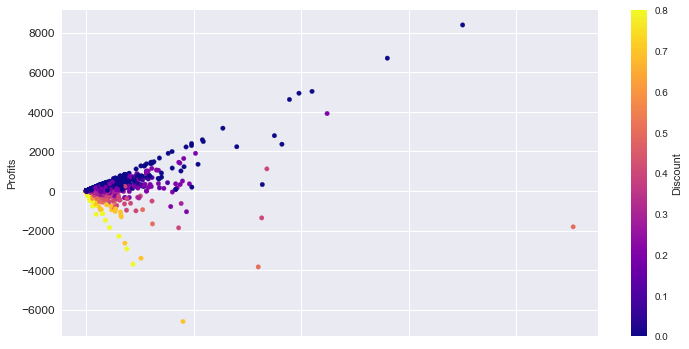

In [25]:
plt.style.use('seaborn')
df.plot(kind="scatter",figsize=(12,6),x="Sales",y="Profit",c="Discount",s=20,fontsize=12,colormap='plasma')
plt.ylabel('Profits')
plt.xlabel('Sales')
plt.show()

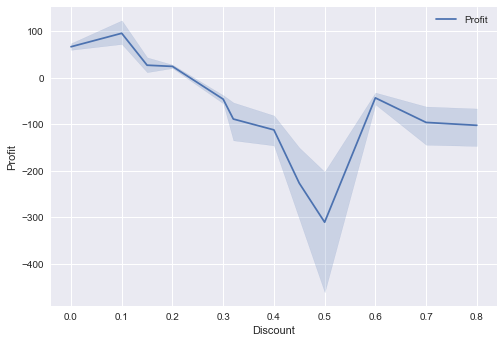

In [26]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

# We can clearly observe that the discount has a negative relation with profit i.e. as the profit is increasing the Profit generated is decreased.

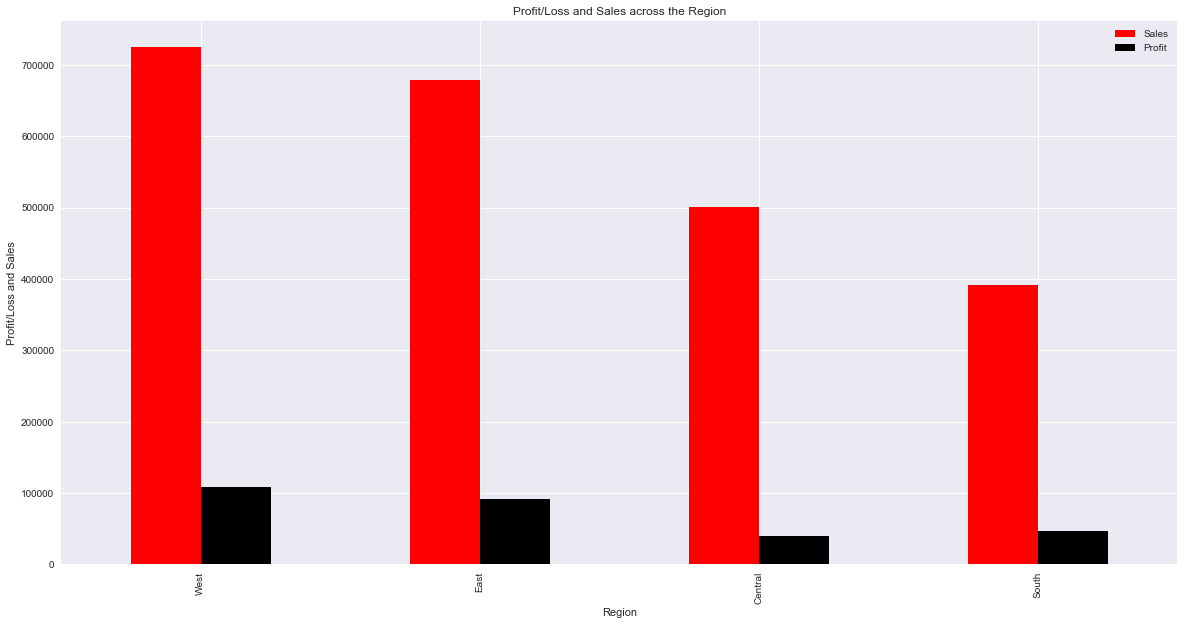

In [27]:
pls=df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the Region')
plt.xlabel('Region')
plt.ylabel('Profit/Loss and Sales')
plt.show()

# More the Discount More the Sales but lesser the Profits

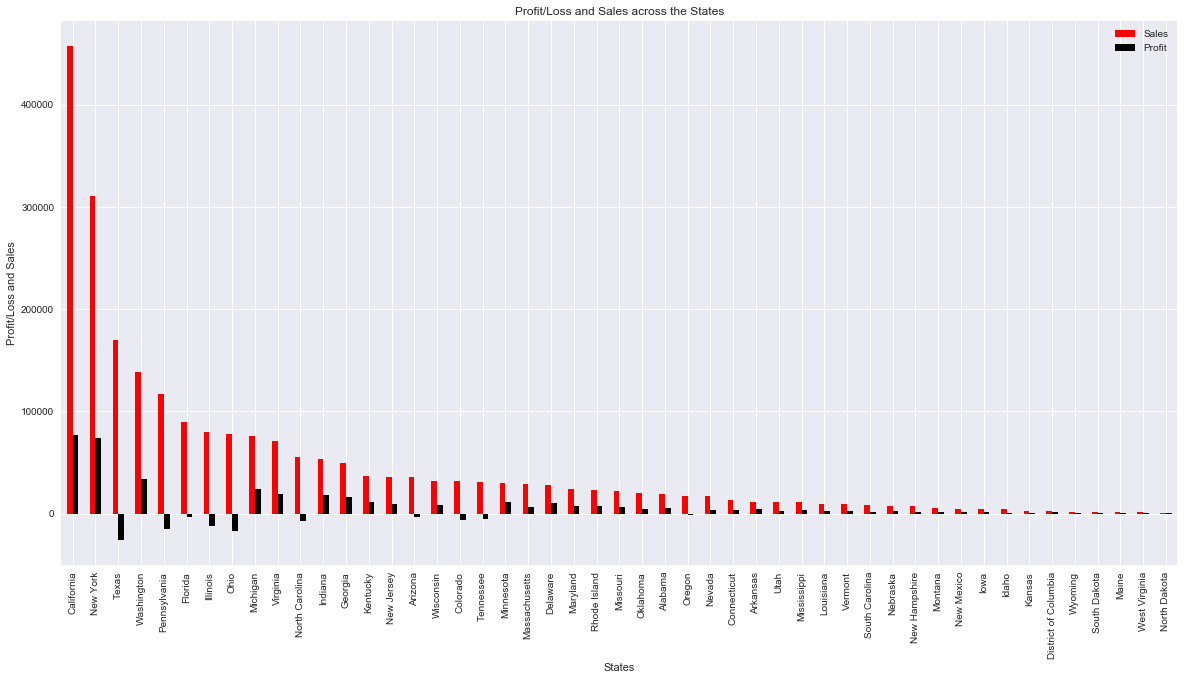

In [29]:
pls=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

# From the above graph we can conclude that:

Work more on california and New York as they are places of Maximum sales
Decrease Discounts in Southern Region to increase sales
Reduce sales of furniture as it has very less profit compared to sales.
The Profit generated by office supplies category is more,
but the sales for office suppliers are less. So, we have to work on increasing the sales for office supplies category.

# Hence our Task-3 ompleted